### Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train-perceptron.txt to train-perceptron.txt


In [3]:
train_data = np.loadtxt('/content/train-perceptron.txt')
train_data

array([[ 1. ,  1. ,  1. ],
       [ 1. , -1. ,  1. ],
       [ 2. ,  2.5,  2. ],
       [ 0. ,  2. ,  2. ],
       [ 2. ,  3. ,  2. ],
       [ 4. ,  5. ,  1. ]])

### TASK - 1

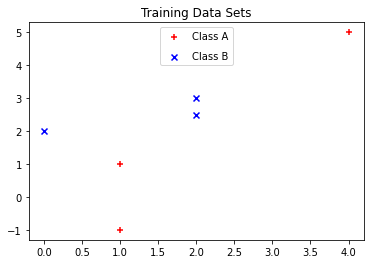

In [4]:
A_class = []
B_class = []

for idx in train_data:
  if idx[2]==1:
    A_class.append(idx)
  else:
    B_class.append(idx)

A_class = np.array(A_class)
B_class = np.array(B_class)

x1 = A_class[:,0]
y1 = A_class[:,1]
x2 = B_class[:,0]
y2 = B_class[:,1]

fig, ax = plt.subplots(1,1,squeeze=True)
plt.title('Training Data Sets')
ax.scatter(x1,y1,marker='+',color='r',label='Class A')
ax.scatter(x2,y2,marker='x',color='b',label='Class B')
legend = ax.legend(loc='upper center', shadow=False, fontsize='medium',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

### TASK - 2

In [11]:
def high_dim(x1,x2):
  return np.array([x1*x1, x2*x2, x1*x2, x1, x2, 1])

y = []

for idx in range(len(x1)):
  y.append(high_dim(x1[idx],y1[idx]))


for idx in range(len(x2)):
  p = high_dim(x2[idx],y2[idx])
  y.append(np.dot(p,-1))

y = np.array(y)
y

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [16.  , 25.  , 20.  ,  4.  ,  5.  ,  1.  ],
       [-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [ 0.  , -4.  ,  0.  ,  0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

### TASK - 3

In [13]:
def Batch(weight, learning_rate):
    i = 0
    while(i<200):
        flag =0; #initilally all classified
        sum = np.zeros_like(y[0])
        wy=[]
        for j in range(len(y)):
            wy.append(np.dot(weight,y[j])) #multiplication of wTy
            if(wy[j] <= 0):
                flag=1 #misclassified detected
                sum = sum + y[j] #summation of misclassified data
                 
        weight = weight + (learning_rate * sum) 
        if(flag == 0):
               return i+1
        i=i+1
    return i+1 #if iteration exists 200 , it will return 200   

In [14]:
def Single(weight, learning_rate):
    i=0
    while(i<200):
        flag =0; #initilally all classified
        
        wy=[]
        for j in range(len(y)):
            wy.append(np.dot(weight,y[j])) #multiplication of wTy
            if(wy[j] <= 0):
                flag=1 #misclassified detected
                sum = np.zeros_like(y[0])
                sum = sum + y[j] #summation of misclassified data
                weight = weight + (learning_rate * sum)  
        
        if(flag == 0):
               return i+1
        i=i+1
    return i+1 #if iteration exists 200 , it will return 200   
        